## We want to confirm two things and start implementing.

## Fitting strategy really doesn't make sense -- it seems using temporal spacing is cheap and good

## The correlation between pixel and label distance is low, and it only shows for a particular set of queries (which is hard to know beforehand).

## To improve upon this strategy, let's try using the labels directly.

In [1]:
print('hello world')

hello world


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys
sys.path.append('/nethome/jbang36/eko')

In [4]:
from eko_paper2022.motivation.main import *
import time


### Cherry Dataset

### New optimization

#### We will implement and test our new strategy

#### build anchors during preprocessing

#### get more anchors during query execution

In [5]:
video_name = 'cherry'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st

09-14-2022 16:55:45 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/cherry/video.mp4 is (100000, 240, 360, 3)
meta data of the video /srv/data/jbang36/video_data/cherry/video.mp4 is (100000, 240, 360, 3)
100%|██████████| 100000/100000 [00:20<00:00, 4878.27it/s]


In [11]:

eko = execute_eko(images, video_name, nb_buckets = 1000, dist_param = 0, temp_param = 1)

#### okay, now we have to run the queries and see what values they give

from eko_paper2022.system_architecture.analysis import *

eko_times, eko_reps = query_process4(eko)
print('eko', eko_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 228.03it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

eko [(0.9063670411985019, 0.8956168903553752, 0.9009598995245358), (0.7959139317539665, 0.7631286468463462, 0.7791765665449129), (0.6055118110236221, 0.6469433538979249, 0.6255422993492409), (0.4125984251968504, 0.5695652173913044, 0.4785388127853881), (0.031496062992125984, 0.09090909090909091, 0.04678362573099415), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]


/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [ ]:
#### 

In [12]:
#### train eko
from eko_paper2022.system_architecture.main import *

ekos = execute_ekos(images, video_name, nb_buckets = 1000)
### Run ekos
ekos_times, ekos_reps, y_trues = query_process4_simple(ekos)
print('ekos', ekos_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 800
801 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/801 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

ekos [(0.9314424561722228, 0.9144557898961073, 0.9228709641129484), (0.8622378133450267, 0.8195332036676855, 0.8403433170696962), (0.7983734327346662, 0.6606842400448683, 0.7230320699708456), (0.8352941176470589, 0.30869565217391304, 0.45079365079365086), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0), (0.0, 0.0, 0.0)]


/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [9]:
### Run ekos

from eko_paper2022.system_architecture.main import *

eko_alt = execute_ekoalt(images, video_name, nb_buckets = 1000)
from eko_paper2022.system_architecture.analysis import *
ekos_times, ekos_reps, y_trues = query_process4_simple(eko_alt)
print('ekos', ekos_times)

index initializing....
number of training instances:  1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 500
501 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/501 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

ekos [(0.930381191508788, 0.9087260890890445, 0.9194261481548318), (0.8655656960741707, 0.8300916921367046, 0.8474576271186441), (0.8631284916201117, 0.6065619742007852, 0.7124505928853755), (0.9513513513513514, 0.3826086956521739, 0.5457364341085271), (0.0, 0.0, 0.0)]


/srv/data/jbang36/anaconda3/envs/eko22/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#### repeat for different datasets



In [14]:
video_name = 'ua_detrac'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st

09-12-2022 19:35:16 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
100%|██████████| 83791/83791 [00:17<00:00, 4893.35it/s]


In [15]:

eko = execute_eko(images, video_name, nb_buckets = 1000, dist_param = 0, temp_param = 1)

from eko_paper2022.system_architecture.analysis import *

eko_times, eko_reps = query_process4(eko)
print('eko', eko_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 271.58it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

eko [(0.9620372702090154, 0.967813442099663, 0.9649167119204881), (0.9221121356165168, 0.9146476552958218, 0.9183647278586605), (0.8808404522401388, 0.8805882154768723, 0.8807143157983406), (0.871876910535969, 0.8628910268046227, 0.8673606957861553), (0.8687987263830684, 0.8854872578028061, 0.877063613051134), (0.8843240328885295, 0.9024732454813063, 0.8933064647894995), (0.8824450119449707, 0.8993745014902816, 0.8908293311711262)]


In [16]:
#### train eko
from eko_paper2022.system_architecture.main import *

ekos = execute_ekos(images, video_name, nb_buckets = 1000)

### Run ekos
ekos_times, ekos_reps, y_trues = query_process4_simple(ekos)
print('ekos', ekos_times)


index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 806
807 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/807 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

ekos [(0.9644926088693567, 0.9785422947331087, 0.971466656606431), (0.9186381118397388, 0.9430084926293066, 0.9306637887537141), (0.8872097248373138, 0.9048445238015026, 0.8959403562612582), (0.8727380248373743, 0.8929630301930175, 0.8827346950982444), (0.8980423745362234, 0.8778992077884891, 0.8878565567836285), (0.9215147265077139, 0.9037937769952405, 0.9125682301143071), (0.8964459531307513, 0.9201544855379707, 0.9081455087835598)]


In [17]:
### Run ekos

from eko_paper2022.system_architecture.main import *

eko_alt = execute_ekoalt(images, video_name, nb_buckets = 1000)
from eko_paper2022.system_architecture.analysis import *
ekos_times, ekos_reps, y_trues = query_process4_simple(eko_alt)
print('ekos', ekos_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 502
503 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/503 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

ekos [(0.9616727317584655, 0.9874851164086844, 0.9744080094493504), (0.9198669739329626, 0.946686738432698, 0.9330841749427845), (0.8882876241853608, 0.8931206414445979, 0.8906975767502414), (0.8820823493171783, 0.866319759585325, 0.8741300012210508), (0.8929271895203273, 0.8799513219433044, 0.8863917699232036), (0.9140979020979021, 0.8990343613304355, 0.9065035576082886), (0.9105895963310333, 0.9251920574283196, 0.9178327502915209)]


In [ ]:
#### repeat for different datasets



In [18]:
video_name = 'dashcam2'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st

09-12-2022 19:39:40 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
100%|██████████| 74880/74880 [00:34<00:00, 2165.40it/s]


In [22]:

eko = execute_eko(images, video_name, nb_buckets = 1000, dist_param = 0, temp_param = 1)


#### okay, now we have to run the queries and see what values they give

from eko_paper2022.system_architecture.analysis import *

eko_times, eko_reps = query_process4(eko)
print('eko', eko_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 280.41it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

eko [(0.8915061295971979, 0.8996597888039588, 0.8955644008532535), (0.628230980751604, 0.6206084751901485, 0.6243964653366129), (0.5304002444240757, 0.5738842975206612, 0.5512861225785963), (0.5300077942322681, 0.45122760451227606, 0.4874551971326164), (0.32456140350877194, 0.26811594202898553, 0.29365079365079366)]


In [23]:
#### train eko
from eko_paper2022.system_architecture.main import *

ekos = execute_ekos(images, video_name, nb_buckets = 1000)

### Run ekos
ekos_times, ekos_reps, y_trues = query_process4_simple(ekos)
print('ekos', ekos_times)


index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 806
807 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/807 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

ekos [(0.9108114712219828, 0.9058012636415853, 0.9082994583697928), (0.7374667485164723, 0.6526620789568996, 0.6924776635603805), (0.7085737840065952, 0.5682644628099174, 0.6307099614749586), (0.6221374045801527, 0.43264764432647645, 0.510371819960861), (0.6636363636363637, 0.21159420289855072, 0.32087912087912085)]


In [24]:
### Run ekos

from eko_paper2022.system_architecture.main import *

eko_alt = execute_ekoalt(images, video_name, nb_buckets = 1000)
from eko_paper2022.system_architecture.analysis import *
ekos_times, ekos_reps, y_trues = query_process4_simple(eko_alt)
print('ekos', ekos_times)

index initializing....
1
mining complete!
training complete!
inferring complete!
rep indices stats 1000 500
501 1000
bucketing complete!


Target DNN Invocations:   0%|          | 0/501 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

ekos [(0.9025733228452635, 0.8872001060398533, 0.8948206905003288), (0.7348087021755438, 0.7095255342267295, 0.7219458264234384), (0.6602519244226732, 0.623801652892562, 0.6415094339622641), (0.7659115426105717, 0.47113470471134705, 0.5834018077239113), (0.6875, 0.4144927536231884, 0.5171790235081375)]


In [81]:



### define the parameters to use for grid search
### then run the thing and collect the results.
### display the results on the graph.
params = []
### let's do parameter searching with eko
for i in range(20):
    pp = i * 0.05
    tp = 1 - pp
    params.append((pp, tp))

    
### 
from eko_paper2022.motivation.main import *

eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 100, dist_param = dist, temp_param = temp)
    



09-05-2022 15:52:52 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/cherry/video.mp4 is (100000, 240, 360, 3)
meta data of the video /srv/data/jbang36/video_data/cherry/video.mp4 is (100000, 240, 360, 3)
100%|██████████| 100000/100000 [00:23<00:00, 4325.07it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 24.42it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.93it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.56it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 22.80it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.13it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.31it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.92it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.34it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 23.13it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 22.91it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 25.47it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 25.52it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.57it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.02it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 30.00it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 31.07it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 33.49it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 32.61it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

In [95]:
#### let's do a restart, now that we confirmed that 
images.shape

(74880, 360, 640, 3)

In [11]:

from eko_paper2022.motivation.main import *

all_results = []
for index_name, index in eko_indexes.items():
    times = query_process1(index)
    all_results.append( (index_name, times) )
    
    

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62590.5
debiased_estimate            63892.27585297654
nb_samples                   21212
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62590.5
debiased_estimate            65161.17171931133
nb_samples                   1072
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62590.5
debiased_estimate            -38774.92267553187
nb_samples                   78
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62206.5
debiased_estimate            63289.12548450098
nb_samples                   21258
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62206.5
debiased_estimate            62790.88943758722
nb_samples                   1084
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62206.5
debiased_estimate            -40132.08684336433
nb_samples                   80
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62114.5
debiased_estimate            62801.68726014276
nb_samples                   21203
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62114.5
debiased_estimate            63509.62834585054
nb_samples                   1068
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62114.5
debiased_estimate            -34661.034156950496
nb_samples                   78
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62229.0
debiased_estimate            63027.971990854945
nb_samples                   21715
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62229.0
debiased_estimate            61917.28582791092
nb_samples                   1072
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62229.0
debiased_estimate            -32130.504340490297
nb_samples                   77
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61920.0
debiased_estimate            63222.08805908103
nb_samples                   20932
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61920.0
debiased_estimate            62000.69907080021
nb_samples                   1047
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61920.0
debiased_estimate            -36955.423652822996
nb_samples                   77
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62054.0
debiased_estimate            63091.61042238374
nb_samples                   21010
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62054.0
debiased_estimate            61540.27203665793
nb_samples                   1046
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62054.0
debiased_estimate            -39406.86821599144
nb_samples                   77
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61936.0
debiased_estimate            63477.2904070823
nb_samples                   21323
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61936.0
debiased_estimate            61526.39833802373
nb_samples                   1037
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             61936.0
debiased_estimate            -37505.14918404394
nb_samples                   76
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62514.0
debiased_estimate            63531.20592732662
nb_samples                   21079
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62514.0
debiased_estimate            61206.64184288047
nb_samples                   1056
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62514.0
debiased_estimate            -36211.75011790829
nb_samples                   78
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62372.5
debiased_estimate            63171.68860986251
nb_samples                   21229
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62372.5
debiased_estimate            63250.2474278808
nb_samples                   1061
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62372.5
debiased_estimate            -30087.24238956112
nb_samples                   82
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62744.5
debiased_estimate            63278.544279557944
nb_samples                   21863
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62744.5
debiased_estimate            62257.13683687182
nb_samples                   1032
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62744.5
debiased_estimate            -34529.95397374052
nb_samples                   76
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             66404.5
debiased_estimate            62826.27332829846
nb_samples                   22329
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             66404.5
debiased_estimate            61217.34822898746
nb_samples                   1065
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             66404.5
debiased_estimate            -46461.2878259721
nb_samples                   78
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72520.0
debiased_estimate            63247.93095483898
nb_samples                   29593
y_pred                       [          0   0.0020964   0.0041929 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72520.0
debiased_estimate            62548.455866160424
nb_samples                   1369
y_pred                       [          0   0.0020964   0.0041929 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72520.0
debiased_estimate            -38611.095925964655
nb_samples                   98
y_pred                       [          0   0.0020964   0.0041929 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75916.5
debiased_estimate            63287.708777842556
nb_samples                   32798
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75916.5
debiased_estimate            60984.62764405306
nb_samples                   1462
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75916.5
debiased_estimate            -30970.808231883893
nb_samples                   97
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77122.0
debiased_estimate            63129.83860641128
nb_samples                   31594
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77122.0
debiased_estimate            62185.74984528379
nb_samples                   1374
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77122.0
debiased_estimate            -40204.11614274085
nb_samples                   97
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77017.5
debiased_estimate            63689.16623720969
nb_samples                   33511
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77017.5
debiased_estimate            59927.80659974251
nb_samples                   1459
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 6.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             77017.5
debiased_estimate            -36367.824654545875
nb_samples                   99
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             76372.5
debiased_estimate            63394.989122095336
nb_samples                   30798
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             76372.5
debiased_estimate            62470.970802347
nb_samples                   1286
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             76372.5
debiased_estimate            -35361.75535080397
nb_samples                   85
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74398.0
debiased_estimate            63151.80853028888
nb_samples                   32114
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74398.0
debiased_estimate            57162.2237510084
nb_samples                   1315
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74398.0
debiased_estimate            -31202.284016367164
nb_samples                   86
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74129.5
debiased_estimate            63403.07728493996
nb_samples                   32204
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74129.5
debiased_estimate            63027.42132935106
nb_samples                   1331
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74129.5
debiased_estimate            -30858.615728365578
nb_samples                   82
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72417.5
debiased_estimate            63468.84992684172
nb_samples                   32300
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72417.5
debiased_estimate            63960.33064580122
nb_samples                   1337
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72417.5
debiased_estimate            -26239.969466756684
nb_samples                   84
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72865.5
debiased_estimate            63166.06604596615
nb_samples                   33217
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72865.5
debiased_estimate            60686.08516591499
nb_samples                   1338
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72865.5
debiased_estimate            -33915.72064903081
nb_samples                   82
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


In [15]:

from eko_paper2022.system_architecture.main import *
from eko_paper2022.motivation.main import *

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
alphas, betas = [], []
for i in range(3):
    ekops = execute_ekops(images, video_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    alphas.append(alpha)
    betas.append(beta)
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
final alpha, beta values:  0.5290799668876985 0.47092003311230146


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:08<00:00, 108.89it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             65038.0
debiased_estimate            63309.29708769517
nb_samples                   23068
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22373.405284341425
debiased_estimate                           22521.615062644883
nb_samples                                  80596
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
50339
(50339,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  407   444   467 ... 99997 99998 99999]
inds_length                      34733
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f5b28476850>
precision                        0.9339533008954021
recall                           0.7232130913630891
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:08<00:00, 104.23it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63742.5
debiased_estimate            63457.299083793805
nb_samples                   21490
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22568.541557531804
debiased_estimate                           22483.89605792766
nb_samples                                  69580
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51905
(51905,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   65    74   260 ... 99997 99998 99999]
inds_length                      39030
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f5b293aa370>
precision                        0.9395849346656419
recall                           0.817585945512106
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 121.75it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75338.5
debiased_estimate            63318.389768003406
nb_samples                   27521
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            23054.04126325808
debiased_estimate                           22519.781121923465
nb_samples                                  69406
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
54656
(54656,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  252   290   305 ... 99978 99986 99992]
inds_length                      6667
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f5b28f34520>
precision                        0.6667166641667917
recall                           0.09909929995095197


[0.47092003311230146, 0.8001333963835489, 0.2500987796051507]
[0.47092003311230146, 0.8001333963835489, 0.2500987796051507]
[0.47092003311230146, 0.8001333963835489, 0.2500987796051507]


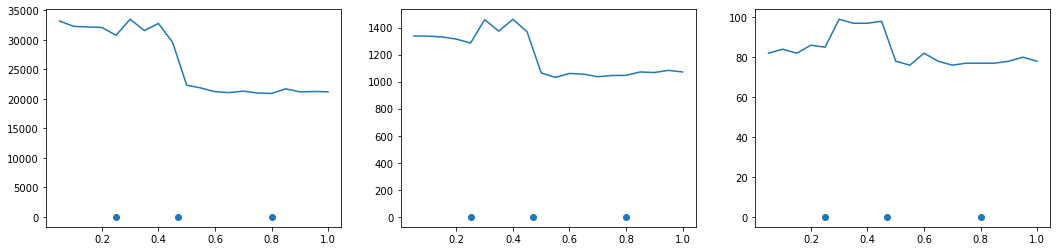

In [16]:
draw_graphs(all_results, optim_results)

In [ ]:
#### let's investigate the index.... are we selecting things properly?
#### 

In [64]:
#### 
from eko_paper2022.system_architecture.analysis import CustomQuery, query_process3, query_process4

my_results = []
for index_name, index in eko_indexes.items():

    times = query_process4(index)
    my_results.append( (index_name, times) )


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

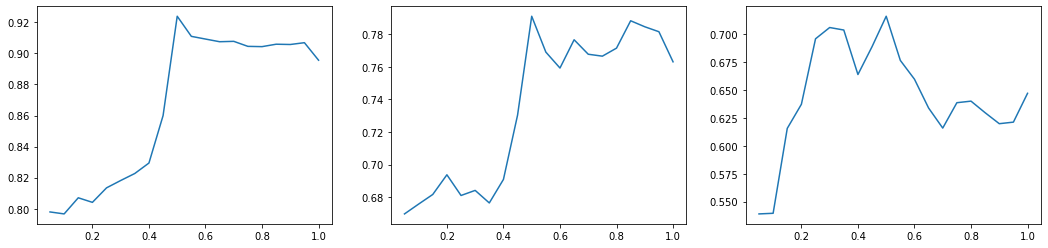

In [65]:
draw_graphs(my_results)

In [ ]:
#### okay, how did we end up with two index of the same thing? this doesn't make any sense..



In [82]:
#### 100 anchors

#### 
from eko_paper2022.system_architecture.analysis import CustomQuery, query_process3, query_process4

my_results = []
for index_name, index in eko_indexes.items():

    times = query_process4(index)
    my_results.append( (index_name, times) )

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

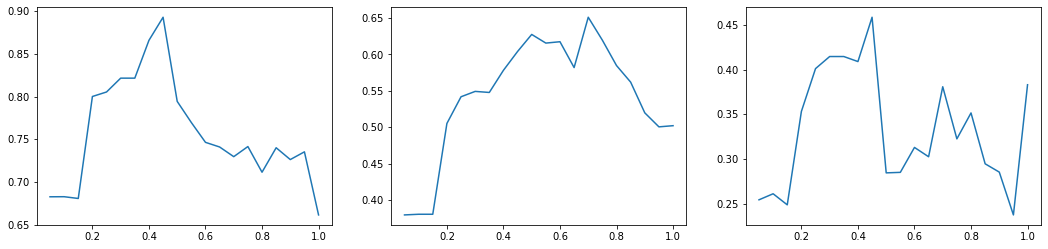

In [83]:
draw_graphs(my_results)

In [85]:
my_results

[((0.0, 1.0), [0.6612565211575333, 0.5022228396776882, 0.3830622546270331]),
 ((0.05, 0.95), [0.7351629732019441, 0.5006251736593498, 0.23808188446438586]),
 ((0.1, 0.9), [0.7261113836001248, 0.5198666296193387, 0.2857543466068424]),
 ((0.15000000000000002, 0.85),
  [0.7399563026708877, 0.5620311197554876, 0.2950084127874369]),
 ((0.2, 0.8), [0.7112855040799037, 0.5848152264517922, 0.35165451486259114]),
 ((0.25, 0.75), [0.7413608596780666, 0.6196165601555987, 0.3227706113292204]),
 ((0.30000000000000004, 0.7),
  [0.7295224506175592, 0.6511530980828008, 0.3808188446438587]),
 ((0.35000000000000003, 0.6499999999999999),
  [0.740848084897668, 0.5820366768546819, 0.3028603477285474]),
 ((0.4, 0.6), [0.7462879564810273, 0.6175326479577661, 0.3132361189007291]),
 ((0.45, 0.55), [0.7694965889329826, 0.6156571269797166, 0.2854739203589456]),
 ((0.5, 0.5), [0.7942658402818031, 0.6275354265073632, 0.284913067863152]),
 ((0.55, 0.44999999999999996),
  [0.8928746600080261, 0.6041261461517088, 0.4

In [ ]:
import matplotlib.pyplot as plt
def draw_graphs(all_results, optim_results = None):
    fontsize = 12
    plt.rcParams['xtick.labelsize'] = fontsize - 2
    plt.rcParams['ytick.labelsize'] = fontsize - 2

    ### first we need to figure out how many rows / columns we need
    row_count = 1
    col_count = 3
    fig_size = (col_count * 6, row_count * 4)

    fig, ax = plt.subplots(row_count, col_count, sharex=False, figsize=fig_size)
    
    for i in range(3):
        ### organize all_results
        x_axis = []
        y_axis = []
        optim_axis = []
        for j in range(len(all_results)):
            x_axis.append( all_results[j][0][1] )
            y_axis.append( all_results[j][1][i] )
        
        if optim_results is not None:
            for key in optim_results:
                _, temp = key
                optim_axis.append(temp)

            print(optim_axis)
        ax[i].plot(x_axis, y_axis)
        ax[i].scatter(optim_axis, [0] * len(optim_axis))

### UA-DETRAC

In [89]:
video_name = 'ua_detrac'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st


eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 100, dist_param = dist, temp_param = temp)
    
    
#### 
from eko_paper2022.system_architecture.analysis import CustomQuery, query_process3, query_process4, query_process4_uadetrac

my_results = []
for index_name, index in eko_indexes.items():

    times = query_process4_uadetrac(index)
    my_results.append( (index_name, times) )

09-05-2022 16:23:10 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
100%|██████████| 83791/83791 [00:17<00:00, 4738.08it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.81it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 27.39it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.17it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.32it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.04it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.82it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.00it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.34it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.84it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.13it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 27.87it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 26.28it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 27.71it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.75it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.23it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.97it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 27.92it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.40it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.98it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 10


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 28.09it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

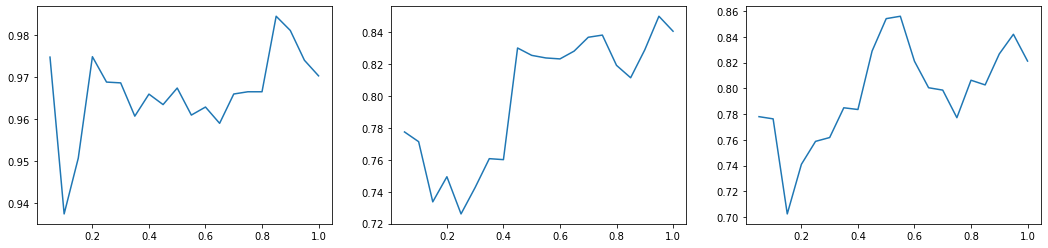

In [90]:
draw_graphs(my_results)


## Dashcam 2

In [91]:
video_name = 'dashcam2'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st


eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 100, dist_param = dist, temp_param = temp)
    
    
#### 
from eko_paper2022.system_architecture.analysis import CustomQuery, query_process3, query_process4

my_results = []
for index_name, index in eko_indexes.items():

    times = query_process4(index)
    my_results.append( (index_name, times) )

09-05-2022 16:31:03 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
100%|██████████| 74880/74880 [00:37<00:00, 1992.43it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.90it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 30.03it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.94it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.99it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.88it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.50it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 30.01it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.78it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.66it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.54it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.84it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.34it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:03<00:00, 29.55it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 31.17it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 32.16it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 33.21it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 34.65it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 33.59it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 35.80it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 100 9


Choosing Other Rep Indices..: 100%|██████████| 90/90 [00:02<00:00, 36.04it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/100 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

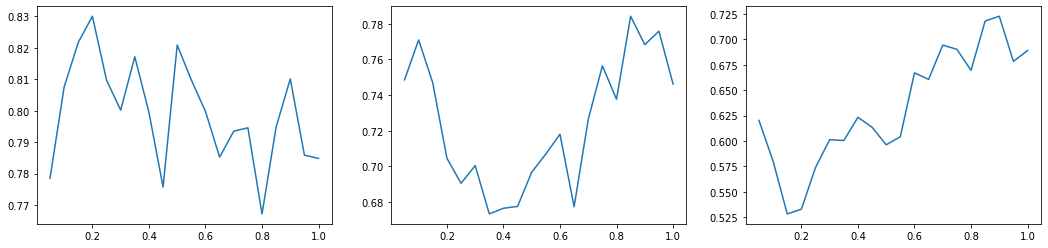

In [92]:
draw_graphs(my_results)

### Calculating Optimal Alpha, Beta Values

In [70]:

from eko_paper2022.system_architecture.main import *
from eko_paper2022.motivation.main import *

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
alphas, betas = [], []
for i in range(30):
    ekops = execute_ekops(images, video_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    alphas.append(alpha)
    betas.append(beta)
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
final alpha, beta values:  0.6143041134372511 0.385695886562749


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.30it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             69928.5
debiased_estimate            63399.66370348199
nb_samples                   25983
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22607.59153433889
debiased_estimate                           22528.008991941584
nb_samples                                  83979
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51624
(51624,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  275   473   478 ... 99971 99972 99988]
inds_length                      6608
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a9badd00>
precision                        0.7182203389830508
recall                           0.10580996120747313
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 127.27it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             65113.0
debiased_estimate            63143.59936066463
nb_samples                   22325
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22251.036792647094
debiased_estimate                           22615.77950388563
nb_samples                                  78893
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
49713
(49713,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   70   461   471 ... 99997 99998 99999]
inds_length                      37037
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac6897f0>
precision                        0.9367659367659368
recall                           0.7735096089534935
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 138.78it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             69449.0
debiased_estimate            63032.31448944075
nb_samples                   27679
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22401.572895243764
debiased_estimate                           22572.650266628254
nb_samples                                  84508
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51191
(51191,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  275   436   487 ... 99981 99982 99984]
inds_length                      6658
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a70b6be0>
precision                        0.7179333133072995
recall                           0.10656797610023633
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 133.06it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             65916.5
debiased_estimate            63065.688093024466
nb_samples                   22718
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22991.04688838683
debiased_estimate                           22497.30055519534
nb_samples                                  83322
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51093
(51093,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  275   326   476 ... 99968 99985 99993]
inds_length                      6614
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae79cdf0>
precision                        0.7627759298457817
recall                           0.11247603335265528
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.76it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72883.5
debiased_estimate            63132.406770841175
nb_samples                   28123
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22358.954494832084
debiased_estimate                           22543.898132737806
nb_samples                                  87442
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
53836
(53836,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   14    34    47 ... 99989 99995 99996]
inds_length                      6647
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac4db760>
precision                        0.6822626748909283
recall                           0.10110580996120748
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 135.48it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             66807.0
debiased_estimate            63601.838792891904
nb_samples                   23272
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22750.149581061676
debiased_estimate                           22559.059356750717
nb_samples                                  81299
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
53054
(53054,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  177   275   469 ... 99986 99987 99997]
inds_length                      6613
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f319bbc7c10>
precision                        0.7433842431574172
recall                           0.10960003567128906
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 140.18it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74864.0
debiased_estimate            62983.538066334935
nb_samples                   30243
y_pred                       [          0   0.0021231   0.0042463 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22808.248001545668
debiased_estimate                           22521.382196742168
nb_samples                                  85952
y_pred                                      [          0   0.0015517   0.0031034 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
50294
(50294,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   37    42    55 ... 99985 99996 99999]
inds_length                      6656
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0   0.0021231   0.0042463 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a82dfcd0>
precision                        0.6822415865384616
recall                           0.10123957729522451
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 121.23it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75287.5
debiased_estimate            63195.660388774675
nb_samples                   28728
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22713.28338710405
debiased_estimate                           22566.011620689285
nb_samples                                  86207
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
52520
(52520,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  293   498   523 ... 99973 99986 99992]
inds_length                      6649
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8340190>
precision                        0.679350278237329
recall                           0.10070450795915638
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.43it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75226.5
debiased_estimate            62946.09365750332
nb_samples                   29510
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            23034.35114935599
debiased_estimate                           22521.170668282768
nb_samples                                  84475
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
54104
(54104,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    8   475   483 ... 99983 99985 99998]
inds_length                      6663
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a40f98b0>
precision                        0.6675671619390665
recall                           0.0991661836179605
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 141.29it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             69672.0
debiased_estimate            63294.75024547668
nb_samples                   27588
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            21417.340107429776
debiased_estimate                           22535.794448295426
nb_samples                                  85942
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51655
(51655,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  153   219   240 ... 99980 99989 99993]
inds_length                      6618
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f319dc26d00>
precision                        0.714868540344515
recall                           0.10547554287243055
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.24it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             71635.5
debiased_estimate            62792.674169168095
nb_samples                   30930
y_pred                       [          0   0.0021231   0.0042463 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22114.269508043304
debiased_estimate                           22568.6227682081
nb_samples                                  86898
y_pred                                      [          0   0.0015517   0.0031034 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
53010
(53010,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   68    70   133 ... 99989 99992 99996]
inds_length                      6654
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0   0.0021231   0.0042463 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac06a160>
precision                        0.6732792305380222
recall                           0.09987960939938467
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63467.5
debiased_estimate            63206.4616634584
nb_samples                   20905
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22424.077824667096
debiased_estimate                           22548.259834641765
nb_samples                                  74089
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
49661
(49661,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  409   425   428 ... 99997 99998 99999]
inds_length                      36983
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f1ff6997400>
precision                        0.9474353081145391
recall                           0.7811789361038034
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.89it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63304.5
debiased_estimate            63426.263746651166
nb_samples                   22108
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22445.960382260382
debiased_estimate                           22546.754266927794
nb_samples                                  74685
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
49231
(49231,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  156   201   328 ... 99997 99998 99999]
inds_length                      39078
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a83607f0>
precision                        0.9416295613900404
recall                           0.8203727649707941
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 140.09it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             71798.5
debiased_estimate            63148.248933204544
nb_samples                   28736
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22281.923694036897
debiased_estimate                           22512.715089865505
nb_samples                                  76978
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
52936
(52936,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  339   504   525 ... 99984 99989 99994]
inds_length                      6656
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0de5dc0>
precision                        0.6906550480769231
recall                           0.10248807241271682
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 138.27it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             68233.0
debiased_estimate            63536.828334320504
nb_samples                   27109
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22084.629516474903
debiased_estimate                           22605.82646344755
nb_samples                                  80532
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
52240
(52240,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  240   466   486 ... 99976 99979 99990]
inds_length                      6640
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8262070>
precision                        0.7167168674698795
recall                           0.1060997904311767
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.15it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             74523.5
debiased_estimate            63065.37008748575
nb_samples                   29043
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22652.422310186546
debiased_estimate                           22529.872351718237
nb_samples                                  85668
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
50797
(50797,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  258   274   474 ... 99988 99994 99998]
inds_length                      6654
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a96685e0>
precision                        0.6723775172828373
recall                           0.09974584206536764
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.85it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             73422.5
debiased_estimate            63373.38226524502
nb_samples                   29052
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22419.874136231836
debiased_estimate                           22560.470852559916
nb_samples                                  84750
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
53149
(53149,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   77    84   304 ... 99993 99994 99995]
inds_length                      6629
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a81dfa30>
precision                        0.6841152511691054
recall                           0.10110580996120748
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 127.35it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             65187.5
debiased_estimate            63343.25453973048
nb_samples                   23697
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22143.743940666318
debiased_estimate                           22560.77920456965
nb_samples                                  77587
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51309
(51309,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   69   117   223 ... 99997 99998 99999]
inds_length                      35143
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8439400>
precision                        0.9302563810716217
recall                           0.728853613947474
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.48it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63715.0
debiased_estimate            63077.413793383654
nb_samples                   20822
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22357.784249121327
debiased_estimate                           22482.557080630882
nb_samples                                  76189
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51169
(51169,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  173   383   415 ... 99997 99998 99999]
inds_length                      38930
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae994310>
precision                        0.9437708707937323
recall                           0.8191242698533018
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 141.02it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             73090.5
debiased_estimate            63362.026713211315
nb_samples                   28602
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22208.496838934716
debiased_estimate                           22540.145275095736
nb_samples                                  87060
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
54720
(54720,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  160   276   357 ... 99997 99998 99999]
inds_length                      6641
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31acad4760>
precision                        0.6795663303719319
recall                           0.10061532973647835
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 143.47it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             72458.0
debiased_estimate            62798.09758242254
nb_samples                   27605
y_pred                       [          0   0.0021277   0.0042553 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22257.366052066907
debiased_estimate                           22546.464798421257
nb_samples                                  88081
y_pred                                      [          0    0.001555   0.0031099 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
49945
(49945,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   44    57   138 ... 99954 99955 99976]
inds_length                      6622
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0   0.0021277   0.0042553 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ade8ee80>
precision                        0.6701902748414377
recall                           0.09894323806126544
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 141.61it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             71460.5
debiased_estimate            63402.57809749938
nb_samples                   28229
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22378.12305566296
debiased_estimate                           22509.948093798386
nb_samples                                  86534
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
50592
(50592,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  235   351   385 ... 99985 99986 99990]
inds_length                      6639
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a83568b0>
precision                        0.6963398102123813
recall                           0.10306773086012395
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 141.46it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             69714.0
debiased_estimate            63306.652016072505
nb_samples                   27262
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            21436.63513956592
debiased_estimate                           22565.577248847978
nb_samples                                  86423
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
52300
(52300,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  106   275   467 ... 99964 99976 99983]
inds_length                      6600
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31adf657c0>
precision                        0.7204545454545455
recall                           0.10601061220849868
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.54it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63629.0
debiased_estimate            63099.03539759566
nb_samples                   21034
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22593.631657037884
debiased_estimate                           22536.072906735157
nb_samples                                  72867
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
48604
(48604,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  262   409   417 ... 99997 99998 99999]
inds_length                      38869
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ad1fa8e0>
precision                        0.9432709871620057
recall                           0.8174075890667499
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             63801.0
debiased_estimate            63510.46931361935
nb_samples                   19951
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22422.083963299174
debiased_estimate                           22476.398754808622
nb_samples                                  73924
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
50192
(50192,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  183   223   434 ... 99997 99998 99999]
inds_length                      39693
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b01c50a0>
precision                        0.9408963797143073
recall                           0.8326347705890221
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 139.06it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             75637.5
debiased_estimate            63419.68779485945
nb_samples                   25930
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22838.67518675886
debiased_estimate                           22555.687415802517
nb_samples                                  86172
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
52989
(52989,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  408   473   475 ... 99971 99972 99974]
inds_length                      6646
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a7f794c0>
precision                        0.6796569365031598
recall                           0.10070450795915638
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 141.41it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             71115.5
debiased_estimate            62933.89668687223
nb_samples                   28220
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            21721.726584214717
debiased_estimate                           22611.835385230468
nb_samples                                  84377
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51262
(51262,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  470   481   485 ... 99977 99988 99989]
inds_length                      6617
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a49298e0>
precision                        0.7078736587577452
recall                           0.10442769875596379
index initializing....
mining complete!
training comp

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 128.86it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             65482.5
debiased_estimate            63492.22215057228
nb_samples                   22973
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22293.335868295282
debiased_estimate                           22590.41049312581
nb_samples                                  80084
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
51715
(51715,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [  471   477   478 ... 99997 99998 99999]
inds_length                      34060
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f1ffd8d3ac0>
precision                        0.9305049911920141
recall                           0.706581352833638
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:07<00:00, 122.97it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             62533.0
debiased_estimate            63446.47402713019
nb_samples                   21094
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22480.862844571475
debiased_estimate                           22527.718316107643
nb_samples                                  74520
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
49339
(49339,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   64    79   122 ... 99997 99998 99999]
inds_length                      39004
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a3e96df0>
precision                        0.943980104604656
recall                           0.8208632451955232
index initializing....
mining complete!
training compl

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 135.19it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 5.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             66899.5
debiased_estimate            63506.34671763693
nb_samples                   25744
y_pred                       [          0           0           0 ...           3           3           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate              63322.0


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            22790.97127376683
debiased_estimate                           22556.095016474705
nb_samples                                  81945
y_pred                                      [          0           0           0 ...     0.60226     0.60158      0.6009]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
actual_estimate                             22546.95356662199


Propagation:   0%|          | 0/100000 [00:00<?, ?it/s]

imp sampler
100000
(100000,)
imp sampler
54973
(54973,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   83   275   292 ... 99978 99991 99992]
inds_length                      6606
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=99997) DNNOutputCacheFloat(idx=99998) DNNOutputCacheFloat(idx=99999)]
y_pred                           [          0           0           0 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae20e5e0>
precision                        0.7399333938843475
recall                           0.10897578811254292


In [71]:
np.mean(alphas), np.mean(betas)

(0.5964450713412599, 0.40355492865873993)

In [72]:
from eko_paper2022.system_architecture.main import *
from eko_paper2022.motivation.main import *

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
alphas, betas = [], []
for i in range(30):
    ekops = execute_ekops(dashcam_images, dashcam_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    alphas.append(alpha)
    betas.append(beta)
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
final alpha, beta values:  0.24138193550980405 0.7586180644901959


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.50it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156557.0
debiased_estimate            157795.65082389372
nb_samples                   54792
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18807.438820281994
debiased_estimate                           18800.668435568783
nb_samples                                  58268
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49794
(49794,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6    12    16 ... 74128 74137 74259]
inds_length                      6548
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31af2c4a00>
precision                        0.846212583995113
recall                           0.12240975566650467
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.23it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 14.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156157.5
debiased_estimate            157565.0544146941
nb_samples                   49973
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19018.008093276992
debiased_estimate                           18781.709672337427
nb_samples                                  57268
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49147
(49147,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     9    13 ... 74163 74208 74831]
inds_length                      9924
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31af4814c0>
precision                        0.8814993954050786
recall                           0.19325763266027482
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.51it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 14.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             158154.0
debiased_estimate            157731.06617736182
nb_samples                   56463
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19017.804382116534
debiased_estimate                           18786.653258911894
nb_samples                                  56471
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52210
(52210,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   10    11    26 ... 74551 74691 74876]
inds_length                      6572
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a9735850>
precision                        0.8469263542300669
recall                           0.12296204656916891
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 168.89it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154484.5
debiased_estimate            158016.22763066774
nb_samples                   57760
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18948.547983774915
debiased_estimate                           18788.07960257352
nb_samples                                  60544
y_pred                                      [    0.39119     0.39114     0.39109 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50299
(50299,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     3     7 ... 74774 74787 74868]
inds_length                      6564
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a7f94a30>
precision                        0.8270871419865935
recall                           0.11993549242256882
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 167.39it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             148375.5
debiased_estimate            158233.6803897453
nb_samples                   53022
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18786.817018589005
debiased_estimate                           18799.029345404444
nb_samples                                  60103
y_pred                                      [    0.39119     0.39114     0.39109 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49842
(49842,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     3     6 ... 74403 74574 74597]
inds_length                      6559
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae0680d0>
precision                        0.8345784418356457
recall                           0.12092961604736446
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.43it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 14.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155756.0
debiased_estimate            157726.70932747677
nb_samples                   54997
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18967.991680075414
debiased_estimate                           18820.402949441792
nb_samples                                  55845
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49929
(49929,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     5     9 ... 74175 74549 74712]
inds_length                      6565
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31acbaf160>
precision                        0.8527037319116527
recall                           0.12366897892457915
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 168.40it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             151114.5
debiased_estimate            157679.32816086675
nb_samples                   55640
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19023.85900996439
debiased_estimate                           18794.368238007457
nb_samples                                  60147
y_pred                                      [    0.39119     0.39114     0.39109 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52091
(52091,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    10    13 ... 74430 74702 74779]
inds_length                      6585
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a48fd760>
precision                        0.8208048595292331
recall                           0.11940529315601113
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.49it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154560.5
debiased_estimate            157767.52644587963
nb_samples                   53654
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18857.14202715084
debiased_estimate                           18769.905331156624
nb_samples                                  58609
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49116
(49116,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     7     9 ... 74564 74728 74757]
inds_length                      6552
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0533c10>
precision                        0.8533272283272283
recall                           0.12351433747183316
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.75it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             158652.0
debiased_estimate            157756.41230964562
nb_samples                   53986
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19149.54130250495
debiased_estimate                           18747.181170087282
nb_samples                                  58482
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50699
(50699,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6    13    26 ... 74705 74821 74863]
inds_length                      6585
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b09c3250>
precision                        0.8542141230068337
recall                           0.12426545309945655
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 166.98it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             152575.5
debiased_estimate            157798.85658384822
nb_samples                   55105
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18884.257047088817
debiased_estimate                           18803.342939273894
nb_samples                                  60649
y_pred                                      [    0.39119     0.39037     0.38955 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52070
(52070,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   25    29    32 ... 74241 74304 74659]
inds_length                      6586
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b08503d0>
precision                        0.830245976313392
recall                           0.12079706623072504
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 157.78it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155029.5
debiased_estimate            157957.9635477777
nb_samples                   48994
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18725.395886132494
debiased_estimate                           18771.017310824263
nb_samples                                  59371
y_pred                                      [    0.39119     0.39175     0.39231 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52192
(52192,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    14    18 ... 74174 74479 74598]
inds_length                      7716
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b055c940>
precision                        0.8657335406946605
recall                           0.14757212919188795
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.27it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156747.5
debiased_estimate            157706.89912122503
nb_samples                   54974
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19102.879242104478
debiased_estimate                           18791.25180651639
nb_samples                                  56938
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49977
(49977,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     7    13 ... 74359 74370 74375]
inds_length                      6571
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31adb7acd0>
precision                        0.8462943235428397
recall                           0.12285158838863607
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.07it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             153289.0
debiased_estimate            158076.71017039887
nb_samples                   53218
y_pred                       [          4      3.9818      3.9636 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19166.429779062513
debiased_estimate                           18776.107731927696
nb_samples                                  60251
y_pred                                      [    0.39119     0.39214     0.39308 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50724
(50724,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5     9    40 ... 74612 74623 74674]
inds_length                      6586
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b051afa0>
precision                        0.8382933495293046
recall                           0.12196792294437327
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.54it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154067.0
debiased_estimate            157884.91901212872
nb_samples                   53329
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18590.963724087458
debiased_estimate                           18798.42948768055
nb_samples                                  59451
y_pred                                      [    0.39119     0.39175     0.39231 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50742
(50742,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     6    17 ... 74436 74451 74650]
inds_length                      6564
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31addab550>
precision                        0.8606032906764168
recall                           0.12479565236601423
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 162.76it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154655.0
debiased_estimate            157994.5959722149
nb_samples                   57048
y_pred                       [          4      3.9818      3.9636 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19116.51639128849
debiased_estimate                           18785.091076029235
nb_samples                                  58158
y_pred                                      [    0.39119     0.39214     0.39308 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51992
(51992,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    22    24 ... 74581 74722 74831]
inds_length                      6583
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a9bad820>
precision                        0.8356372474555673
recall                           0.12152609022224185
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.52it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             153884.5
debiased_estimate            157810.95780364992
nb_samples                   50540
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18860.21566533856
debiased_estimate                           18809.851373348913
nb_samples                                  59237
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49303
(49303,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     9    10 ... 74176 74427 74871]
inds_length                      7671
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f1ffd8e6e80>
precision                        0.8653369834441402
recall                           0.146644280475412
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 167.66it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154186.5
debiased_estimate            157544.34140984828
nb_samples                   57832
y_pred                       [          4      3.9893      3.9786 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18429.038891871463
debiased_estimate                           18790.71136246846
nb_samples                                  60130
y_pred                                      [    0.39119     0.39014      0.3891 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
53671
(53671,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    10    15 ... 74381 74640 74684]
inds_length                      6601
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99732     0.99464 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8861460>
precision                        0.8263899409180427
recall                           0.12050987496133964
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.31it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155851.0
debiased_estimate            157829.9274712072
nb_samples                   54927
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18717.12823685631
debiased_estimate                           18768.522818366273
nb_samples                                  56969
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51515
(51515,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    20    23 ... 74581 74586 74667]
inds_length                      6611
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0e2c820>
precision                        0.8451066404477386
recall                           0.12342597092740688
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.77it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156018.5
debiased_estimate            157651.29285317028
nb_samples                   53343
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18924.54626695253
debiased_estimate                           18822.543399029575
nb_samples                                  58507
y_pred                                      [    0.39119     0.39026     0.38932 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50133
(50133,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     6 ... 74156 74160 74420]
inds_length                      6573
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8128940>
precision                        0.8477103301384451
recall                           0.12309459638580833
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 174.21it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             149237.0
debiased_estimate            157779.4041694489
nb_samples                   59215
y_pred                       [          4      3.9924      3.9848 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18646.019196951762
debiased_estimate                           18769.984836192907
nb_samples                                  59875
y_pred                                      [    0.39119     0.39045     0.38971 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52708
(52708,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    3     4    13 ... 74360 74367 74618]
inds_length                      6584
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99811     0.99621 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0bf9370>
precision                        0.8174362089914945
recall                           0.11889718552556003
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.53it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155654.5
debiased_estimate            157767.87184465528
nb_samples                   44577
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18853.3560091611
debiased_estimate                           18817.418184580267
nb_samples                                  58684
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52560
(52560,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     6    11 ... 74145 74157 74165]
inds_length                      6593
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a806c850>
precision                        0.8405885029576824
recall                           0.12243184730261124
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.18it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 14.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154841.5
debiased_estimate            157804.65724469558
nb_samples                   56864
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18958.92136305943
debiased_estimate                           18799.678598457172
nb_samples                                  57311
y_pred                                      [    0.39119     0.39175     0.39231 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50022
(50022,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2    10    11 ... 74516 74809 74861]
inds_length                      6577
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b087a8b0>
precision                        0.8529724798540368
recall                           0.123934078557858
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.07it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156299.5
debiased_estimate            157787.73465210255
nb_samples                   53651
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19142.09383653011
debiased_estimate                           18788.321923800628
nb_samples                                  59301
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52614
(52614,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   22    24    46 ... 74442 74469 74806]
inds_length                      6577
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b05a1070>
precision                        0.8447620495666718
recall                           0.12274113020810322
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.13it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             160203.5
debiased_estimate            157508.8113706077
nb_samples                   53962
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19240.83167761471
debiased_estimate                           18808.252413377602
nb_samples                                  58673
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51152
(51152,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    22    23 ... 74524 74674 74675]
inds_length                      6569
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31af39d250>
precision                        0.8511188917643477
recall                           0.12351433747183316
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.57it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             157023.5
debiased_estimate            157605.58430134138
nb_samples                   52471
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18919.87014773581
debiased_estimate                           18779.2262860776
nb_samples                                  56027
y_pred                                      [    0.39119     0.39157     0.39196 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49887
(49887,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     9    16 ... 74182 74831 74834]
inds_length                      6564
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac44d580>
precision                        0.8487202925045704
recall                           0.12307250474970176
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.16it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156018.5
debiased_estimate            158100.75803898732
nb_samples                   52412
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18924.54626695253
debiased_estimate                           18799.640255329065
nb_samples                                  56131
y_pred                                      [    0.39119     0.39026     0.38932 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50133
(50133,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     6 ... 74156 74160 74420]
inds_length                      6573
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8163ca0>
precision                        0.8477103301384451
recall                           0.12309459638580833
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.63it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156018.5
debiased_estimate            157499.7799951564
nb_samples                   52474
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18924.54626695253
debiased_estimate                           18793.687008891742
nb_samples                                  57797
y_pred                                      [    0.39119     0.39026     0.38932 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50133
(50133,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     6 ... 74156 74160 74420]
inds_length                      6573
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a9ba40d0>
precision                        0.8477103301384451
recall                           0.12309459638580833
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 168.11it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             151447.0
debiased_estimate            157735.56576777433
nb_samples                   58190
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            18649.546669105068
debiased_estimate                           18801.51641995929
nb_samples                                  59841
y_pred                                      [    0.39119     0.39037     0.38955 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49769
(49769,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    16    25 ... 74607 74660 74807]
inds_length                      6574
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a85526a0>
precision                        0.8387587465774262
recall                           0.12181328149162728
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.44it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 14.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155766.0
debiased_estimate            157744.51412068578
nb_samples                   55040
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19043.02721181698
debiased_estimate                           18818.980552083543
nb_samples                                  59852
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
53043
(53043,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    32    33 ... 74174 74416 74759]
inds_length                      6587
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae350760>
precision                        0.8459086078639745
recall                           0.12309459638580833
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.25it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             160157.0
debiased_estimate            157462.652633472
nb_samples                   49528
y_pred                       [          4      3.9896      3.9792 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            19278.4782601865
debiased_estimate                           18763.659477672936
nb_samples                                  58786
y_pred                                      [    0.39119      0.3918      0.3924 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             18783.092893114313


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51487
(51487,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     9    13 ... 74385 74678 74819]
inds_length                      6577
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a803fbb0>
precision                        0.8429375095028129
recall                           0.12247603057482437


In [73]:
np.mean(alphas), np.mean(betas)

(0.32125306277152543, 0.6787469372284746)

In [74]:

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
alphas, betas = [], []
for i in range(30):
    ekops = execute_ekops(ua_images, ua_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    alphas.append(alpha)
    betas.append(beta)
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
final alpha, beta values:  0.7198589000385516 0.2801410999614485


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 152.04it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             586994.0
debiased_estimate            573711.1636583038
nb_samples                   78796
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33467.41540227551
debiased_estimate                           32760.255370242114
nb_samples                                  67145
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    39    40 ... 83778 83784 83786]
inds_length                      6736
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b1554430>
precision                        0.9545724465558195
recall                           0.08144807843335951
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 152.82it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             581890.5
debiased_estimate            573881.3546967953
nb_samples                   80352
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33043.70949849206
debiased_estimate                           32765.011172482355
nb_samples                                  65451
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   10    12    13 ... 83721 83764 83780]
inds_length                      6717
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31aaf534f0>
precision                        0.9492332886705375
recall                           0.080764066577154
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 156.69it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             575911.0
debiased_estimate            573493.4485730856
nb_samples                   80877
y_pred                       [         11      10.987      10.975 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32935.87814595899
debiased_estimate                           32770.904666984396
nb_samples                                  67251
y_pred                                      [    0.50853     0.50859     0.50866 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    32    40 ... 83748 83783 83789]
inds_length                      6739
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f319a1b69a0>
precision                        0.9513280902211011
recall                           0.08120740759506498
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.91it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             582274.5
debiased_estimate            573275.5038567544
nb_samples                   79608
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32711.904816580703
debiased_estimate                           32832.46238359646
nb_samples                                  66207
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     2     3 ... 83788 83789 83790]
inds_length                      66201
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac7d7100>
precision                        0.961601788492621
recall                           0.8063613102627112
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 162.02it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574231.0
debiased_estimate            573552.5584355472
nb_samples                   81144
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32883.851339353016
debiased_estimate                           32758.158612263436
nb_samples                                  64738
y_pred                                      [    0.50853     0.50889     0.50926 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    25    30 ... 83773 83775 83790]
inds_length                      6732
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ad7665b0>
precision                        0.9518716577540107
recall                           0.0811694069363869
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 144.80it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 28.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             579372.5000000001
debiased_estimate            574167.242586838
nb_samples                   76044
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33393.94012844376
debiased_estimate                           32796.35241225326
nb_samples                                  65736
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78684
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac09b730>
precision                        0.9622540796095775
recall                           0.9590606237174778
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.12it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             584526.9999999999
debiased_estimate            573502.8280114839
nb_samples                   80437
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32840.985542761395
debiased_estimate                           32779.453612129066
nb_samples                                  65088
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78366
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0771bb0>
precision                        0.9579919863205982
recall                           0.9509538165328199
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 151.96it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             584017.0
debiased_estimate            573461.565336471
nb_samples                   80559
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33315.2689989768
debiased_estimate                           32812.39707606183
nb_samples                                  65918
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78485
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ae2ea0a0>
precision                        0.9588328980059884
recall                           0.953233856053505
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 150.78it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             584465.0
debiased_estimate            574093.2170122295
nb_samples                   79255
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33435.343567851
debiased_estimate                           32761.42799698268
nb_samples                                  66638
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78578
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a84164c0>
precision                        0.9587161801013007
recall                           0.9542472069515872
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 155.54it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             585025.9999999999
debiased_estimate            573523.1116272026
nb_samples                   80242
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32940.87158624106
debiased_estimate                           32809.62045887081
nb_samples                                  66213
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75411
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b02abb80>
precision                        0.9615705931495405
recall                           0.9185139209079624
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 144.05it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             577608.5
debiased_estimate            573481.0082239094
nb_samples                   78852
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33592.33121831156
debiased_estimate                           32785.843339361556
nb_samples                                  64950
y_pred                                      [    0.50853     0.50897     0.50941 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75835
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a3ea3d60>
precision                        0.9642381486121184
recall                           0.9262407215058395
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 157.25it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             576013.5
debiased_estimate            573639.1410389859
nb_samples                   80975
y_pred                       [         11      10.987      10.975 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32959.41528064361
debiased_estimate                           32775.48805435143
nb_samples                                  60472
y_pred                                      [    0.50853     0.50859     0.50866 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     2     9 ... 83781 83788 83790]
inds_length                      6739
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ad8e8460>
precision                        0.9529603798783203
recall                           0.08134674334355128
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 144.27it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             575110.5
debiased_estimate            573550.5388681693
nb_samples                   79154
y_pred                       [         11      11.035      11.071 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33146.78791159624
debiased_estimate                           32805.30540788372
nb_samples                                  58916
y_pred                                      [    0.50853     0.50896      0.5094 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78298
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a99d97c0>
precision                        0.964328590768602
recall                           0.9564132444962379
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 161.33it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574231.0
debiased_estimate            573694.7565964772
nb_samples                   80761
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32883.851339353016
debiased_estimate                           32794.66168378113
nb_samples                                  67016
y_pred                                      [    0.50853     0.50889     0.50926 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    25    30 ... 83773 83775 83790]
inds_length                      6732
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31aee6c2e0>
precision                        0.9518716577540107
recall                           0.0811694069363869
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.77it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             583389.5
debiased_estimate            573546.3106436204
nb_samples                   79952
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33074.4909861451
debiased_estimate                           32723.365055380993
nb_samples                                  65362
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   22    48    51 ... 83782 83783 83785]
inds_length                      6729
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31aba9e280>
precision                        0.952444642591767
recall                           0.08118207382261293
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 150.32it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             579528.0
debiased_estimate            573505.3203754551
nb_samples                   79611
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33231.703585646115
debiased_estimate                           32811.72604683039
nb_samples                                  65329
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     3     6 ... 83788 83789 83790]
inds_length                      26782
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ad2e7a90>
precision                        0.961578672242551
recall                           0.32621032097889696
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 145.45it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             568945.0
debiased_estimate            573616.6545768622
nb_samples                   79970
y_pred                       [         11      11.015       11.03 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32410.788393146824
debiased_estimate                           32833.349504852304
nb_samples                                  58468
y_pred                                      [    0.50853     0.51042     0.51231 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77857
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31aeddc8b0>
precision                        0.9642678243446319
recall                           0.9509664834190459
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 146.35it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 28.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             585517.5
debiased_estimate            573897.8445518108
nb_samples                   79327
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33419.03420966491
debiased_estimate                           32751.027826417387
nb_samples                                  64397
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76055
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31aefd6070>
precision                        0.963329169679837
recall                           0.9280520862361614
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 162.06it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574231.0
debiased_estimate            573739.5989520614
nb_samples                   80850
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32883.851339353016
debiased_estimate                           32745.194354703806
nb_samples                                  64870
y_pred                                      [    0.50853     0.50889     0.50926 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    25    30 ... 83773 83775 83790]
inds_length                      6732
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a7dfa610>
precision                        0.9518716577540107
recall                           0.0811694069363869
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 145.51it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             577401.0
debiased_estimate            573772.9522282416
nb_samples                   79745
y_pred                       [         11       11.05        11.1 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33564.51729936525
debiased_estimate                           32734.74765038627
nb_samples                                  64371
y_pred                                      [    0.50853     0.50898     0.50944 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78653
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a83fe8b0>
precision                        0.9613873596684169
recall                           0.957819268867327
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 151.22it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             581089.0
debiased_estimate            573617.8621525564
nb_samples                   80839
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33211.46070747356
debiased_estimate                           32734.76477150237
nb_samples                                  65113
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78430
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a8cd0ca0>
precision                        0.9595052913425985
recall                           0.953233856053505
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 157.34it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             576690.0
debiased_estimate            573881.3328758603
nb_samples                   80905
y_pred                       [         11      10.987      10.975 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33011.54607899463
debiased_estimate                           32692.838254540715
nb_samples                                  41806
y_pred                                      [    0.50853     0.50859     0.50866 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78278
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b11b10d0>
precision                        0.9577531362579524
recall                           0.949649127251539
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 151.04it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             580065.5
debiased_estimate            573937.2220210425
nb_samples                   80499
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33225.79303800221
debiased_estimate                           32776.40658955465
nb_samples                                  66167
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78347
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a4c03670>
precision                        0.9604069077309916
recall                           0.9531198540774707
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.43it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             583707.0
debiased_estimate            573866.3362635181
nb_samples                   79498
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32864.997148342656
debiased_estimate                           32758.485431869423
nb_samples                                  64981
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75487
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f254cb296a0>
precision                        0.9610396492111224
recall                           0.9189319281534213
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 151.57it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             580822.0
debiased_estimate            573787.4691899386
nb_samples                   80774
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33187.17821083869
debiased_estimate                           32794.040907982475
nb_samples                                  67171
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83752
(83752,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75639
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b104ddc0>
precision                        0.9608138658628486
recall                           0.9205659564765789
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 150.79it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             581396.0
debiased_estimate            573662.3671297979
nb_samples                   80881
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33208.86170490365
debiased_estimate                           32795.00976647331
nb_samples                                  67205
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      78430
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b0524430>
precision                        0.9595052913425985
recall                           0.953233856053505
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 153.15it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             587635.5
debiased_estimate            573782.1096140078
nb_samples                   78032
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33031.15391044342
debiased_estimate                           32733.30077514648
nb_samples                                  65916
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75360
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31b1642700>
precision                        0.9615711252653928
recall                           0.917893243482887
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 154.01it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             580809.0
debiased_estimate            573706.9029781022
nb_samples                   79765
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33333.026827988215
debiased_estimate                           32795.55612284093
nb_samples                                  64142
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   14    32    41 ... 83736 83744 83754]
inds_length                      6738
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31a28c5880>
precision                        0.9499851588008311
recall                           0.0810807387328047
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:06<00:00, 146.78it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 28.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             581578.0
debiased_estimate            573674.4492801616
nb_samples                   77129
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            33240.32919345703
debiased_estimate                           32770.33728410082
nb_samples                                  62885
y_pred                                      [    0.50853     0.50939     0.51024 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      75716
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ab86b190>
precision                        0.965317766390195
recall                           0.9258227142603805
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:05<00:00, 159.22it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574781.5
debiased_estimate            573804.2295427744
nb_samples                   81138
y_pred                       [         11      10.987      10.975 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            32953.54677238478
debiased_estimate                           32766.401008883437
nb_samples                                  65554
y_pred                                      [    0.50853     0.50859     0.50866 ...     0.61161     0.61314     0.61467]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             32778.772163012065


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    20    21 ... 83751 83757 83767]
inds_length                      8766
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7f31ac3e9430>
precision                        0.9515172256445357
recall                           0.10565449801129886


In [75]:
np.mean(alphas), np.mean(betas)

(0.7572915181640395, 0.2427084818359607)

In [94]:
a = [1,2,3]
a.insert(1, 'o')
a

[1, 'o', 2, 3]

[0.4483080850325708, 0.6850342016979151, 0.35351772416543975, 0.29165251290081917, 0.43571903427930564, 0.210673952183619, 0.476314142996569, 0.29455590390795955, 0.35640268990982504, 0.4632748718393615]
[0.4483080850325708, 0.6850342016979151, 0.35351772416543975, 0.29165251290081917, 0.43571903427930564, 0.210673952183619, 0.476314142996569, 0.29455590390795955, 0.35640268990982504, 0.4632748718393615]
[0.4483080850325708, 0.6850342016979151, 0.35351772416543975, 0.29165251290081917, 0.43571903427930564, 0.210673952183619, 0.476314142996569, 0.29455590390795955, 0.35640268990982504, 0.4632748718393615]


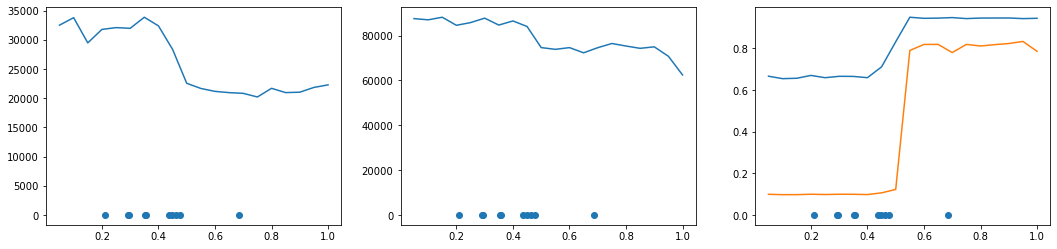

In [24]:
draw_graphs(all_results, optim_results)

In [52]:
images.shape

(100000, 240, 360, 3)

In [66]:
#### first hypothesis, for static cameras we want to see if pixel change and label change have high correlation
#### we will perform random sampling, order them, then compute the pearson coefficient.

#### Then, we will do the same for temporal distance and see which one makes more sense

from eko_paper2022.system_architecture.analysis import *


pixel_vs_temporal(images, video_name)


(999, 2)
0.031767405820349835 0.1797752808988764 0
0.008246766197464879 0.026685393258426966 0
0.08184011620637807 0.07724719101123595 0
0.01532126851963602 0.16713483146067415 0
0.1157962534072794 0.15589887640449437 100
0.11434731335056623 0.011235955056179775 1.135381062825521
0.10424062321883909 0.24719101123595505 10.661656697591146
0.0014811629336398777 0.004213483146067416 100
0.09213023948541671 0.07162921348314606 0
0.09100417422216027 0.5856741573033708 0
0.0025654494553520374 0.01544943820224719 0
0.08293189856035216 0.19662921348314608 0
0.07420611515455858 0.25140449438202245 0
0.027069240373904513 0.08848314606741572 0
0.019025882369502173 0.037921348314606744 0
0.013247924021487107 0.0997191011235955 0
0.07323897657663127 0.11235955056179775 0
0.02702868718203371 0.3398876404494382 0
0.07686365143367532 0.032303370786516857 0
0.028835164955999696 0.2893258426966292 0
0.11676788170413001 0.40730337078651685 200
0.26715186910441785 0.6643258426966292 39.69310506184896
0.24

(0.4304275194985059,
 0.2726063251366165,
 0.5223904943176106,
 0.2393043772382775)

In [67]:
### what happens when we try this with dashcam2?

dashcam_name = 'dashcam2'
st = time.perf_counter()

dashcam_images = load_dataset(dashcam_name)

et = time.perf_counter() - st

09-01-2022 18:31:15 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
 43%|████▎     | 32384/74880 [00:15<00:19, 2139.36it/s]


KeyboardInterrupt: 

In [68]:
pixel_vs_temporal(dashcam_images, dashcam_name)

(999, 2)
0.21514512388322612 0.019313304721030045 200
0.3009977568162652 0.0815450643776824 300
0.16868675001328987 0.023605150214592276 12.089899698893229
0.36473149112452463 0.20386266094420602 400
0.27444277290313296 0.055793991416309016 400
0.20917422794960033 0.2017167381974249 100
0.20250560650379648 0.0815450643776824 0
0.1960713711114939 0.09227467811158799 0
0.25194571144886596 0.10300429184549356 200
0.31795312636875184 0.07725321888412018 200
0.5443824141179578 0.16738197424892703 0
0.3714633422096069 0.06437768240343347 0
0.2578852071218868 0.27253218884120173 300
0.2564848852973754 0.03648068669527897 100
0.2430778066371518 0.034334763948497854 100
0.20390252939147 0.030042918454935622 200
0.387317784994539 0.19957081545064378 100
0.33432874096762016 0.21030042918454936 100
0.4609824927085382 0.38626609442060084 100
0.4290856483292246 0.4334763948497854 200
0.38069664132272735 0.05793991416309013 100
0.21279122091112526 0.034334763948497854 300
0.185315687409674 0.01716738

(0.08174052617990574,
 0.15292882667336027,
 0.07465741583720613,
 0.1292114412464171)

In [69]:
### what happens when we try this with dashcam2?

ua_name = 'ua_detrac'
st = time.perf_counter()

#ua_images = load_dataset(ua_name)

et = time.perf_counter() - st

pixel_vs_temporal(ua_images, ua_name)

(999, 2)
0.4876642205009125 0.07238095238095238 600
0.48384674058911264 0.21904761904761905 222.55329132080075
0.3875665759229717 0.05523809523809524 100
0.5512299618940376 0.3314285714285714 200
0.4528613386897257 0.21714285714285714 900
0.49894845056771414 0.1980952380952381 900
0.6389131127526455 0.7161904761904762 300
0.47414389246623584 0.2057142857142857 200
0.569256955785567 0.05523809523809524 300
0.7247595383132412 0.1619047619047619 200
0.7723791058428154 0.32761904761904764 300
0.2963439705824988 0.1619047619047619 700
0.2852068466613727 0.09714285714285714 300
0.26573034127845313 0.19238095238095237 300
0.7094775137838613 0.18285714285714286 600
0.38157901337003347 0.26095238095238094 900
0.4070645468634513 0.540952380952381 100
0.3235245124446016 0.23047619047619047 300
0.09077003378428465 0.07809523809523809 600
0.09784469433206987 0.013333333333333334 400
0.24488141237885017 0.16380952380952382 300
0.3836672889159995 0.2876190476190476 414.29183737436927
0.25420556548695

(0.25446769340926834,
 0.16191044062506998,
 0.19090076790119903,
 0.13095188241989847)

In [36]:
import matplotlib.pyplot as plt
def draw_graphs(all_results, optim_results = None):
    fontsize = 12
    plt.rcParams['xtick.labelsize'] = fontsize - 2
    plt.rcParams['ytick.labelsize'] = fontsize - 2

    ### first we need to figure out how many rows / columns we need
    row_count = 1
    col_count = 3
    fig_size = (col_count * 6, row_count * 4)

    fig, ax = plt.subplots(row_count, col_count, sharex=False, figsize=fig_size)
    
    for i in range(3):
        ### organize all_results
        x_axis = []
        y_axis = []
        optim_axis = []
        for j in range(len(all_results)):
            x_axis.append( all_results[j][0][1] )
            y_axis.append( all_results[j][1][i] )
        
        if optim_results is not None:
            for key in optim_results:
                _, temp = key
                optim_axis.append(temp)

            print(optim_axis)
        ax[i].plot(x_axis, y_axis)
        ax[i].scatter(optim_axis, [0] * len(optim_axis))

## UA_DETRAC

In [ ]:
### repeat those steps for ua_detrac and dashcam2

In [56]:
video_name = 'ua_detrac'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st


eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 1000, dist_param = dist, temp_param = temp)
    

all_results = []
for index_name, index in eko_indexes.items():
    times = query_process(index)
    all_results.append( (index_name, times) )
    
    
all_results

08-26-2022 01:19:11 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
100%|██████████| 83791/83791 [00:17<00:00, 4888.77it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 274.63it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 278.37it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 270.11it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 277.88it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 276.57it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             565660.5000000001
debiased_estimate            478093.6616490277
nb_samples                   575
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6799.2977971241335
debiased_estimate                           -13481.29372904924
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     9    18 ... 83765 83771 83788]
inds_length                      8661
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fc93f6bee20>
precision                        0.9636300658122618
recall                           0.10571783244242901


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             564854.4999999999
debiased_estimate            489168.65557920234
nb_samples                   569
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6780.7417225195095
debiased_estimate                           -13685.113637177521
nb_samples                                  29
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76164
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb91f95ee0>
precision                        0.9666771703166851
recall                           0.9326121652775314


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             570289.4999999999
debiased_estimate            494965.3254652721
nb_samples                   566
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6818.3822936974475
debiased_estimate                           -13835.319294663572
nb_samples                                  29
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76485
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb8e9bbe80>
precision                        0.9665555337647905
recall                           0.9364248980315659


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             568160.5
debiased_estimate            491829.1870044385
nb_samples                   588
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6834.9930036121505
debiased_estimate                           -13099.891585121215
nb_samples                                  29
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76671
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb87237910>
precision                        0.9664931982105359
recall                           0.9386416031211208


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             567893.0
debiased_estimate            486676.341677063
nb_samples                   582
y_pred                       [         11      11.065      11.131 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6811.577564749401
debiased_estimate                           -13362.475189139614
nb_samples                                  28
y_pred                                      [    0.10461     0.10467     0.10473 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     9    18 ... 83761 83771 83788]
inds_length                      8667
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb7f676e20>
precision                        0.9610014999423099
recall                           0.10550249537658653


[((0.2, 0.8), [575, 28, (0.9636300658122618, 0.10571783244242901)]),
 ((0.25, 0.75), [569, 29, (0.9666771703166851, 0.9326121652775314)]),
 ((0.3, 0.7), [566, 29, (0.9665555337647905, 0.9364248980315659)]),
 ((0.35, 0.65), [588, 29, (0.9664931982105359, 0.9386416031211208)]),
 ((0.4, 0.6), [582, 28, (0.9610014999423099, 0.10550249537658653)])]

In [58]:
from eko_paper2022.system_architecture.main import *

ekops = execute_ekops(images, video_name, nb_buckets = 1000)

times = query_process(ekops)

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
0.007853773096267874 -0.0004196086215518969


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 327.49it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574231.0
debiased_estimate            492939.7971020129
nb_samples                   588
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6764.677992087265
debiased_estimate                           -12850.289897314795
nb_samples                                  28
y_pred                                      [    0.10461     0.10469     0.10476 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    5    25    94 ... 83623 83647 83766]
inds_length                      2960
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb8f98cf70>
precision                        0.952027027027027
recall                           0.03569528538494667


In [59]:
times

[588, 28, (0.952027027027027, 0.03569528538494667)]

08-29-2022 16:34:53 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
meta data of the video /srv/data/jbang36/video_data/ua_detrac/video.mp4 is (83791, 300, 300, 3)
100%|██████████| 83791/83791 [00:17<00:00, 4831.35it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 278.75it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 276.19it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 273.24it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 268.87it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 276.18it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 277.61it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 274.62it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 276.80it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 272.45it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 276.31it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 275.86it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 279.44it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 300.98it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 303.16it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 321.99it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 328.07it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 325.11it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 327.79it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 330.61it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 328.56it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             571411.5
debiased_estimate            487671.2002512855
nb_samples                   549
y_pred                       [         11      11.029      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6769.253972128732
debiased_estimate                           -14042.764257213094
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79665
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a141460>
precision                        0.9612627879244335
recall                           0.970017480302992


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 27.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             567083.0
debiased_estimate            488332.18968730886
nb_samples                   516
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6752.0831311654765
debiased_estimate                           -13713.859376109927
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77614
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a2d35b0>
precision                        0.9649805447470817
recall                           0.9486991107845869


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 27.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             568849.0
debiased_estimate            483458.9334615347
nb_samples                   504
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6761.977524841437
debiased_estimate                           -12305.55113687215
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83692
(83692,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77586
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a658eb0>
precision                        0.9644652385739695
recall                           0.947850429407443


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             568725.4999999999
debiased_estimate            500187.0983236588
nb_samples                   554
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6796.770931218984
debiased_estimate                           -14032.866909189579
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77772
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a874eb0>
precision                        0.9632129815357712
recall                           0.9488891140779774


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             565660.5000000001
debiased_estimate            496355.0242786474
nb_samples                   584
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6799.2977971241335
debiased_estimate                           -13225.515729955441
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77658
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a837370>
precision                        0.963970228437508
recall                           0.9482431028804499


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             564854.4999999999
debiased_estimate            475808.0825762761
nb_samples                   583
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6780.7417225195095
debiased_estimate                           -13207.739647899107
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79454
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29375eb0>
precision                        0.9609585420494877
recall                           0.9671420971296836


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             570289.4999999999
debiased_estimate            489406.24212218734
nb_samples                   553
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6818.3822936974475
debiased_estimate                           -13354.814919906534
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79697
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a536eb0>
precision                        0.9606133229607137
recall                           0.9697514756922453


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             568160.5
debiased_estimate            490413.4413258112
nb_samples                   585
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6834.9930036121505
debiased_estimate                           -13246.107906019331
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79862
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29208280>
precision                        0.9592672359820691
recall                           0.9703974868897728


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             567893.0
debiased_estimate            490237.3299096784
nb_samples                   586
y_pred                       [         11      11.065      11.131 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6811.577564749401
debiased_estimate                           -13668.173957487688
nb_samples                                  28
y_pred                                      [    0.10461     0.10467     0.10473 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83546
(83546,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79793
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2953ad60>
precision                        0.960259671901044
recall                           0.9705621564107111


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             562080.0
debiased_estimate            491051.50030403276
nb_samples                   543
y_pred                       [         11      11.028      11.057 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6764.39710328402
debiased_estimate                           -13628.489587739748
nb_samples                                  28
y_pred                                      [    0.10461     0.10472     0.10484 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79594
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2670deb0>
precision                        0.9610020855843405
recall                           0.9688901274288755


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             565332.0
debiased_estimate            493725.8336853044
nb_samples                   539
y_pred                       [         11      11.039      11.078 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6655.900429778267
debiased_estimate                           -13397.275248128246
nb_samples                                  28
y_pred                                      [    0.10461      0.1047     0.10479 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79338
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb26713310>
precision                        0.9620232423302831
recall                           0.9668000912015808


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 29.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             570358.5
debiased_estimate            490207.26043739734
nb_samples                   540
y_pred                       [         11      11.039      11.078 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6689.33455799776
debiased_estimate                           -13516.633565128715
nb_samples                                  28
y_pred                                      [    0.10461      0.1047     0.10479 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79510
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb292d7d30>
precision                        0.9607219217708465
recall                           0.9675854381475946


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             578399.9999999999
debiased_estimate            484275.75421025936
nb_samples                   578
y_pred                       [         11      11.039      11.078 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6736.6905775819905
debiased_estimate                           -13714.862691209953
nb_samples                                  28
y_pred                                      [    0.10461      0.1047     0.10479 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77256
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29710f40>
precision                        0.9628637257947603
recall                           0.9422516656955388


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             579856.5
debiased_estimate            493270.4929386264
nb_samples                   604
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6761.254446582868
debiased_estimate                           -14813.282498726816
nb_samples                                  29
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77482
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb291ab5b0>
precision                        0.9625203273018249
recall                           0.9446710409647101


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             579498.5
debiased_estimate            481611.68325983785
nb_samples                   589
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6782.774323780554
debiased_estimate                           -14726.855225074029
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79674
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29623790>
precision                        0.9561713984486784
recall                           0.9649887264712589


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 31.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             583636.5
debiased_estimate            478557.86440591014
nb_samples                   601
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6794.260486236307
debiased_estimate                           -13457.682954818287
nb_samples                                  29
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77500
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a5a69d0>
precision                        0.961083870967742
recall                           0.9434803536594635


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             584875.4999999999
debiased_estimate            486612.9770640789
nb_samples                   631
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6750.2778377257055
debiased_estimate                           -13875.024818554666
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77475
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a667550>
precision                        0.9609164246531139
recall                           0.9430116788691004


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             583865.0
debiased_estimate            483845.85182373883
nb_samples                   617
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6790.545406822697
debiased_estimate                           -14349.778331545529
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77416
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29229e80>
precision                        0.9597240880438153
recall                           0.9411243128214223


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574629.5
debiased_estimate            492315.85457521415
nb_samples                   616
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6808.126988614793
debiased_estimate                           -14373.524838782714
nb_samples                                  28
y_pred                                      [    0.10461     0.10469     0.10476 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76882
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb28ff4c10>
precision                        0.959236232147967
recall                           0.9341575253971068


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             575376.0
debiased_estimate            475024.76330179104
nb_samples                   613
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6775.9604143006145
debiased_estimate                           -13121.324105922728
nb_samples                                  28
y_pred                                      [    0.10461     0.10469     0.10476 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79176
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2a444730>
precision                        0.9563251490350612
recall                           0.9591112912623819
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 325.32it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             576610.5
debiased_estimate            499517.6721352123
nb_samples                   631
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6797.081589865382
debiased_estimate                           -13483.369973792938
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76900
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2915a0a0>
precision                        0.959219765929779
recall                           0.9343601955767233
index initializing....
mining complete!
training complet

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 318.66it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             579392.5
debiased_estimate            487674.36071019334
nb_samples                   609
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6795.86937109474
debiased_estimate                           -13032.78198238313
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   14    15    18 ... 83757 83766 83780]
inds_length                      9419
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb91609a30>
precision                        0.9523303960080688
recall                           0.11362196944747043
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 327.52it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             583617.5
debiased_estimate            477995.86598377203
nb_samples                   623
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6788.097357145161
debiased_estimate                           -13808.482398820493
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77443
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb9361aac0>
precision                        0.9594282246297277
recall                           0.9411623134801004
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 325.01it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             582938.5
debiased_estimate            511058.7195252175
nb_samples                   615
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6793.11543551227
debiased_estimate                           -14268.482719579653
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77500
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb76a3c310>
precision                        0.9609806451612903
recall                           0.9433790185696552
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 326.30it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             575484.5
debiased_estimate            476555.0580464466
nb_samples                   618
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6800.667955647106
debiased_estimate                           -13793.812196757503
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76901
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb93601dc0>
precision                        0.9591682812967322
recall                           0.9343221949180452
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 331.16it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             573295.5
debiased_estimate            491122.47914092743
nb_samples                   629
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6786.627927341382
debiased_estimate                           -13262.934858702134
nb_samples                                  28
y_pred                                      [    0.10461     0.10469     0.10476 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      76856
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2920aa90>
precision                        0.9594306235036952
recall                           0.9340308565348466
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 329.63it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             574474.0
debiased_estimate            502075.6173643149
nb_samples                   636
y_pred                       [         11      10.983      10.967 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6783.29137293942
debiased_estimate                           -13608.510029887055
nb_samples                                  28
y_pred                                      [    0.10461     0.10469     0.10476 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77178
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb291fb0a0>
precision                        0.9583819223094664
recall                           0.9369189065943809
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 323.60it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 30.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             578173.5
debiased_estimate            493612.4106024117
nb_samples                   597
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6732.991400702856
debiased_estimate                           -13487.070835100292
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      79573
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fda517c83a0>
precision                        0.9577871891219384
recall                           0.9653940668304918
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 325.50it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             586313.5
debiased_estimate            495003.9237628132
nb_samples                   602
y_pred                       [         11      11.009      11.019 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6776.472521168878
debiased_estimate                           -12627.989897592846
nb_samples                                  28
y_pred                                      [    0.10461     0.10459     0.10456 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77471
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb26ab3df0>
precision                        0.9605658891714319
recall                           0.9426190053960936
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 328.42it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 32.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             582150.0
debiased_estimate            492409.15308350016
nb_samples                   632
y_pred                       [         11      11.014      11.028 ...      2.9444      2.9722           3]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate              573671.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            6789.276318353252
debiased_estimate                           -13074.50813346689
nb_samples                                  28
y_pred                                      [    0.10461     0.10479     0.10496 ...     0.12582     0.12613     0.12645]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
actual_estimate                             6743.061702820356


Propagation:   0%|          | 0/83791 [00:00<?, ?it/s]

imp sampler
83791
(83791,)
imp sampler
83791
(83791,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     1     2 ... 83788 83789 83790]
inds_length                      77447
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=83788) DNNOutputCacheFloat(idx=83789) DNNOutputCacheFloat(idx=83790)]
y_pred                           [          1           1           1 ...           1           1           1]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb769bbd60>
precision                        0.959430320089868
recall                           0.9412129810250044
[0.11413924950289052, 0.3019160534631607, 0.153682385578

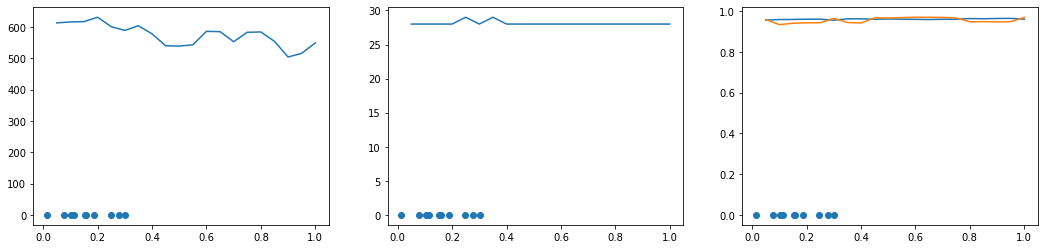

In [141]:
video_name = 'ua_detrac'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st

### define the parameters to use for grid search
### then run the thing and collect the results.
### display the results on the graph.
params = []
### let's do parameter searching with eko
for i in range(20):
    pp = i * 0.05
    tp = 1 - pp
    params.append((pp, tp))

    
### 
from eko_paper2022.motivation.main import *

eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 1000, dist_param = dist, temp_param = temp)
    

all_results = []
for index_name, index in eko_indexes.items():
    times = query_process(index)
    all_results.append( (index_name, times) )
    
from eko_paper2022.system_architecture.main import *
from eko_paper2022.motivation.main import *

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
for i in range(10):
    ekops = execute_ekops(images, video_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times
    
    
draw_graphs(all_results, optim_results)

## Dashcam2

In [60]:
video_name = 'dashcam2'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st


eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 1000, dist_param = dist, temp_param = temp)
    

all_results = []
for index_name, index in eko_indexes.items():
    times = query_process(index)
    all_results.append( (index_name, times) )
    
    
all_results

08-26-2022 01:24:35 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
100%|██████████| 74880/74880 [00:34<00:00, 2148.95it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 290.60it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 290.23it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 288.49it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 289.76it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 288.72it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155480.0
debiased_estimate            92685.39364457078
nb_samples                   205
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3886.351281595358
debiased_estimate                           -15029.232489416741
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52155
(52155,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    11    16 ... 74124 74142 74176]
inds_length                      2921
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb8b85d850>
precision                        0.8445737761040739
recall                           0.05450006627490832


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155343.0
debiased_estimate            82713.43417382968
nb_samples                   206
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3874.849701718893
debiased_estimate                           -14535.57702279816
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50471
(50471,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     9    14 ... 74084 74085 74143]
inds_length                      8961
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb7a36bb80>
precision                        0.9150764423613436
recall                           0.18115141607387444


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156064.5
debiased_estimate            90391.71129487459
nb_samples                   220
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3907.4874072414823
debiased_estimate                           -14697.462362807883
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
48036
(48036,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   19    22    24 ... 74099 74110 74117]
inds_length                      2911
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb7a393880>
precision                        0.8471315699072484
recall                           0.05447797463880175


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156705.0
debiased_estimate            85559.27692282552
nb_samples                   193
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3908.9511982686818
debiased_estimate                           -15221.610446906225
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
58151
(58151,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   50    76    80 ... 74180 74182 74336]
inds_length                      2916
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb7a5b1e80>
precision                        0.8388203017832647
recall                           0.05403614191667035


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             153780.5
debiased_estimate            82514.97273467814
nb_samples                   198
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3839.9284472216386
debiased_estimate                           -13709.110705098401
nb_samples                                  29
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
54097
(54097,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   13    14    33 ... 74129 74156 74572]
inds_length                      2925
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb794f00d0>
precision                        0.8547008547008547
recall                           0.055229090266425133


[((0.2, 0.8), [205, 28, (0.8445737761040739, 0.05450006627490832)]),
 ((0.25, 0.75), [206, 28, (0.9150764423613436, 0.18115141607387444)]),
 ((0.3, 0.7), [220, 28, (0.8471315699072484, 0.05447797463880175)]),
 ((0.35, 0.65), [193, 28, (0.8388203017832647, 0.05403614191667035)]),
 ((0.4, 0.6), [198, 29, (0.8547008547008547, 0.055229090266425133)])]

In [61]:
from eko_paper2022.system_architecture.main import *

ekops = execute_ekops(images, video_name, nb_buckets = 1000)

times = query_process(ekops)

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100
-0.000276087415635816 0.0001474526539179599


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 287.90it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156018.5
debiased_estimate            96827.64424712416
nb_samples                   206
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3893.049523983791
debiased_estimate                           -15077.44066551191
nb_samples                                  28
y_pred                                      [   0.080474    0.080281    0.080089 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51056
(51056,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   11    23    29 ... 74126 74132 74160]
inds_length                      2916
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb8ab32fd0>
precision                        0.8401920438957476
recall                           0.05412450846109663


In [62]:
times

[206, 28, (0.8401920438957476, 0.05412450846109663)]

08-29-2022 16:48:20 [info:049]INFO : meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
meta data of the video /srv/data/jbang36/video_data/dashcam2/video.mp4 is (74880, 360, 640, 3)
100%|██████████| 74880/74880 [00:38<00:00, 1940.90it/s]


index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 285.40it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 287.21it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 288.44it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 289.98it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 284.06it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 290.17it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 288.70it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 289.80it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 277.69it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 284.86it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:04<00:00, 221.96it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 244.60it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 266.31it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 266.91it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 262.34it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 267.56it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 271.60it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 354.77it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 348.68it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 100


Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 352.65it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156018.5
debiased_estimate            79093.44837934489
nb_samples                   204
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3893.049523983791
debiased_estimate                           -14117.959357099711
nb_samples                                  28
y_pred                                      [   0.080474    0.080281    0.080089 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50617
(50617,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    1     6     8 ... 74156 74160 74420]
inds_length                      9156
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fda51310d90>
precision                        0.8482961992136304
recall                           0.1715857376397296


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154837.0
debiased_estimate            74595.30197480645
nb_samples                   205
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3852.25277228927
debiased_estimate                           -14229.331263723103
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49979
(49979,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     4 ... 74663 74737 74870]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e3a02e0>
precision                        0.8528446389496718
recall                           0.17220430345071355


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154930.5
debiased_estimate            76649.9938311093
nb_samples                   203
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3857.9526342609315
debiased_estimate                           -14500.770048151322
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49979
(49979,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     4 ... 74663 74737 74870]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e5742b0>
precision                        0.8528446389496718
recall                           0.17220430345071355


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155071.0
debiased_estimate            89382.16204565574
nb_samples                   211
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3866.438050839992
debiased_estimate                           -14481.345217447511
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50186
(50186,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    9    10    11 ... 74637 74641 74643]
inds_length                      9111
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e6db130>
precision                        0.8518274613105038
recall                           0.1714531878230902


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155480.0
debiased_estimate            85610.8343253172
nb_samples                   208
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3886.351281595358
debiased_estimate                           -14451.026681592746
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50411
(50411,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7    11    15 ... 74158 74162 74553]
inds_length                      9109
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e762dc0>
precision                        0.8550883741354705
recall                           0.17207175363407415


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155343.0
debiased_estimate            86160.42514599353
nb_samples                   206
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3874.849701718893
debiased_estimate                           -14061.817045915124
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49780
(49780,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     7     9 ... 74143 74150 74726]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d5f5e80>
precision                        0.8495623632385121
recall                           0.17154155436751645


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156064.5
debiased_estimate            86073.45967961682
nb_samples                   204
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3907.4874072414823
debiased_estimate                           -14616.611040944526
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49283
(49283,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7     8    10 ... 74230 74367 74601]
inds_length                      9163
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d3920a0>
precision                        0.8505947833678926
recall                           0.172182211814607


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156705.0
debiased_estimate            89787.61692430907
nb_samples                   192
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3908.9511982686818
debiased_estimate                           -14124.650887803708
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50357
(50357,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    3    14    22 ... 74620 74804 74822]
inds_length                      9142
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e52ee80>
precision                        0.8488295777729162
recall                           0.1714310961869836


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             153780.5
debiased_estimate            87328.55731474941
nb_samples                   189
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3839.9284472216386
debiased_estimate                           -14684.134854528133
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
51094
(51094,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    8     9    14 ... 74572 74683 74779]
inds_length                      9157
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d7cb0a0>
precision                        0.8519165665611008
recall                           0.17233685326735299


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155537.0
debiased_estimate            78378.4121056216
nb_samples                   200
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3861.148106364301
debiased_estimate                           -13555.530905681588
nb_samples                                  29
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49013
(49013,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     6     7 ... 74511 74592 74836]
inds_length                      9116
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e525d90>
precision                        0.8497147871873629
recall                           0.17112181328149162


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             158026.99999999997
debiased_estimate            76867.79426963412
nb_samples                   195
y_pred                       [          4      3.9863      3.9726 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3874.0921031327457
debiased_estimate                           -14219.5936483954
nb_samples                                  29
y_pred                                      [   0.080474    0.080633    0.080791 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
48935
(48935,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4    10    15 ... 74127 74600 74696]
inds_length                      9122
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e52b850>
precision                        0.8409340057005043
recall                           0.16946494057349887


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154088.0
debiased_estimate            94127.57971124051
nb_samples                   228
y_pred                       [          4           4           4 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3858.5693325372413
debiased_estimate                           -14800.796350965573
nb_samples                                  28
y_pred                                      [   0.080474    0.080542     0.08061 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50284
(50284,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4    10    13 ... 74702 74760 74826]
inds_length                      9134
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fda5b7d3040>
precision                        0.8242828990584629
recall                           0.1663279282463659


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             152237.49999999997
debiased_estimate            90638.61966848501
nb_samples                   204
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3878.026867916342
debiased_estimate                           -14451.153524342193
nb_samples                                  28
y_pred                                      [   0.080474    0.080463    0.080452 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50245
(50245,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     5     7 ... 74361 74497 74519]
inds_length                      9124
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2da3e100>
precision                        0.8308855765015344
recall                           0.16747669332390758


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155735.5
debiased_estimate            88628.97426091862
nb_samples                   232
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3942.2341861291793
debiased_estimate                           -14223.572881383325
nb_samples                                  28
y_pred                                      [   0.080474    0.080463    0.080452 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49875
(49875,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     2    17 ... 74150 74184 74644]
inds_length                      9155
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d963c40>
precision                        0.829601310759148
recall                           0.16778597622939956


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             152531.5
debiased_estimate            83292.3396256038
nb_samples                   236
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3893.1604320627525
debiased_estimate                           -15098.110871854704
nb_samples                                  28
y_pred                                      [   0.080474    0.080463    0.080452 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49246
(49246,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     2    14 ... 74336 74435 74455]
inds_length                      9160
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d7282e0>
precision                        0.8279475982532751
recall                           0.16754296823222728


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             149493.0
debiased_estimate            93070.26595677306
nb_samples                   229
y_pred                       [          4      3.9959      3.9917 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3898.923257726187
debiased_estimate                           -14790.825128542263
nb_samples                                  28
y_pred                                      [   0.080474    0.080463    0.080452 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50580
(50580,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4     5     6 ... 74203 74367 74712]
inds_length                      9105
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e77efa0>
precision                        0.8207578253706754
recall                           0.165090796624398


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             147753.5
debiased_estimate            88576.25423994838
nb_samples                   230
y_pred                       [          4      3.9924      3.9848 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3874.448532367824
debiased_estimate                           -14383.076602477211
nb_samples                                  28
y_pred                                      [   0.080474    0.080322    0.080169 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52471
(52471,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     4     5 ... 74367 74508 74649]
inds_length                      9161
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99811     0.99621 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d42a400>
precision                        0.8205436087763345
recall                           0.16606282861308708


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             147259.0
debiased_estimate            89249.85940352383
nb_samples                   241
y_pred                       [          4      3.9924      3.9848 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3849.468478448689
debiased_estimate                           -14686.545925928998
nb_samples                                  28
y_pred                                      [   0.080474    0.080322    0.080169 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50435
(50435,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   14    23    27 ... 74779 74798 74802]
inds_length                      9098
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99811     0.99621 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2dafd0a0>
precision                        0.8290833150142889
recall                           0.1666372111518579


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             146148.0
debiased_estimate            73792.09790549736
nb_samples                   234
y_pred                       [          4      3.9924      3.9848 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3818.004921050975
debiased_estimate                           -14028.651642178529
nb_samples                                  28
y_pred                                      [   0.080474    0.080322    0.080169 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49959
(49959,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [   17    21    23 ... 74796 74816 74834]
inds_length                      9116
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99811     0.99621 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d903df0>
precision                        0.8188898639754278
recall                           0.16491406353554544


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 13.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             149647.5
debiased_estimate            79817.62248279933
nb_samples                   226
y_pred                       [          4      3.9924      3.9848 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3858.111146728508
debiased_estimate                           -14083.76589936597
nb_samples                                  28
y_pred                                      [   0.080474    0.080322    0.080169 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49866
(49866,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4    16    18 ... 74747 74791 74817]
inds_length                      9135
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1     0.99811     0.99621 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2d394e20>
precision                        0.8248494800218938
recall                           0.16646047806300535
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 284.25it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             156063.5
debiased_estimate            76387.8012513688
nb_samples                   208
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3907.463740237523
debiased_estimate                           -14002.669153720057
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49283
(49283,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    7     8    10 ... 74230 74367 74601]
inds_length                      9163
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2da3dbb0>
precision                        0.8505947833678926
recall                           0.172182211814607
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 286.88it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154784.5
debiased_estimate            68421.75799231416
nb_samples                   211
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3863.5842974539264
debiased_estimate                           -13581.554118988415
nb_samples                                  29
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50466
(50466,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6    11    13 ... 74537 74596 74712]
inds_length                      9121
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb29b0cfd0>
precision                        0.8529766472974455
recall                           0.171872928909115
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 287.42it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155343.0
debiased_estimate            81582.93500366602
nb_samples                   211
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3874.849701718893
debiased_estimate                           -13804.84687938392
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49780
(49780,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    6     7     9 ... 74143 74150 74726]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb2e559f10>
precision                        0.8495623632385121
recall                           0.17154155436751645
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:02<00:00, 312.84it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             159721.5
debiased_estimate            89861.58590035539
nb_samples                   209
y_pred                       [          4      3.9862      3.9724 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3833.2850436796434
debiased_estimate                           -12531.838985832137
nb_samples                                  29
y_pred                                      [   0.080474    0.080575    0.080676 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
52243
(52243,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     3    10 ... 74278 74514 74738]
inds_length                      9162
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb93623ee0>
precision                        0.83366077275704
recall                           0.16873591658198206
index initializing....
mining complete!
training complete

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 285.96it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155450.5
debiased_estimate            92702.11267391121
nb_samples                   210
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3877.2183993541985
debiased_estimate                           -14388.710674670567
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49741
(49741,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     5    10 ... 74592 74726 74786]
inds_length                      9096
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb5c94f850>
precision                        0.8544415127528584
recall                           0.17169619582026244
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 286.17it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 11.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155473.0
debiased_estimate            87775.71077758483
nb_samples                   194
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3855.197903276654
debiased_estimate                           -14806.223436689335
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49662
(49662,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    2     7    11 ... 74151 74197 74447]
inds_length                      9139
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb836686a0>
precision                        0.8489987963672174
recall                           0.17140900455087704
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 287.53it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154837.0
debiased_estimate            82530.82678374305
nb_samples                   214
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3852.25277228927
debiased_estimate                           -15555.165171736096
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49979
(49979,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     4 ... 74663 74737 74870]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb92de2cd0>
precision                        0.8528446389496718
recall                           0.17220430345071355
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 290.82it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154837.0
debiased_estimate            81241.24637730817
nb_samples                   213
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3852.25277228927
debiased_estimate                           -14624.045450937962
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
49979
(49979,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    0     3     4 ... 74663 74737 74870]
inds_length                      9140
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fd533bece20>
precision                        0.8528446389496718
recall                           0.17220430345071355
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 287.12it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             154670.0
debiased_estimate            88154.1388175606
nb_samples                   209
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3854.527571324201
debiased_estimate                           -13860.73685675091
nb_samples                                  29
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50570
(50570,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4     5    10 ... 74165 74181 74663]
inds_length                      9134
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb8736ae50>
precision                        0.8549375957959273
recall                           0.17251358635620553
index initializing....
mining complete!
training comple

Choosing Other Rep Indices..: 100%|██████████| 899/899 [00:03<00:00, 288.07it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 12.0
NightStreetAggregateQuery
---------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate             155453.5
debiased_estimate            87406.13162584703
nb_samples                   210
y_pred                       [          4      3.9894      3.9787 ...           0           0           0]
y_true                       [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate              157784.0


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

r 1
NightStreetAveragePositionAggregateQuery
------------------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
initial_estimate                            3894.3569856332033
debiased_estimate                           -14433.855967865547
nb_samples                                  28
y_pred                                      [   0.080474    0.080601    0.080727 ...           0           0           0]
y_true                                      [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
actual_estimate                             3863.950538338453


/home/jbang36/eko/benchmarks/stanford/blazeit/blazeit/aggregation/samplers.py:62: RuntimeWarning: invalid value encountered in sqrt
  sigmat = np.sqrt(1/t * (Xt_sqsum - Xt_sum ** 2 / t))


Propagation:   0%|          | 0/74880 [00:00<?, ?it/s]

imp sampler
74880
(74880,)
imp sampler
50721
(50721,)
NightStreetSUPGPrecisionQuery
-------------------------------  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
inds                             [    4     5     6 ... 74294 74376 74716]
inds_length                      9111
y_true                           [DNNOutputCacheFloat(idx=0) DNNOutputCacheFloat(idx=1) DNNOutputCacheFloat(idx=2) ... DNNOutputCacheFloat(idx=74877) DNNOutputCacheFloat(idx=74878) DNNOutputCacheFloat(idx=74879)]
y_pred                           [          1           1           1 ...           0           0           0]
source                           <supg.datasource.datasource.RealtimeDataSource object at 0x7fdb36cb1ee0>
precision                        0.8522664910547689
recall                           0.17154155436751645
[0.7022163450120661, 0.8818214352261553, 0.748042854962

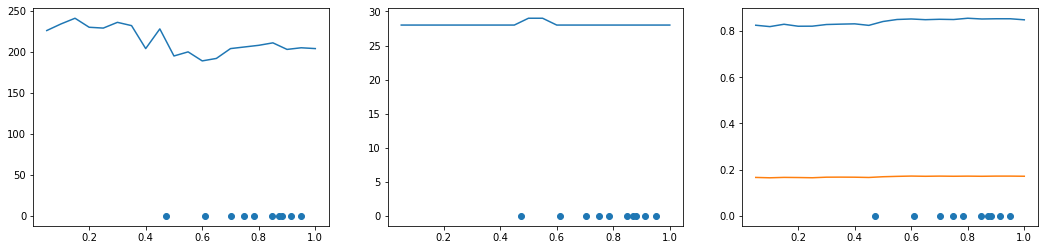

In [142]:
video_name = 'dashcam2'
st = time.perf_counter()

images = load_dataset(video_name)

et = time.perf_counter() - st

### define the parameters to use for grid search
### then run the thing and collect the results.
### display the results on the graph.
params = []
### let's do parameter searching with eko
for i in range(20):
    pp = i * 0.05
    tp = 1 - pp
    params.append((pp, tp))

    
### 
from eko_paper2022.motivation.main import *

eko_indexes = {}
for param in params:
    dist, temp = param
    eko_indexes[param] = execute_eko(images, video_name, nb_buckets = 1000, dist_param = dist, temp_param = temp)
    

all_results = []
for index_name, index in eko_indexes.items():
    times = query_process(index)
    all_results.append( (index_name, times) )
    
from eko_paper2022.system_architecture.main import *
from eko_paper2022.motivation.main import *

### we need to run the optimization.
### since we perform random sampling, there is high variance in the alpha, beta values selected.... so we will do 10 runs each and report the results.
optim_results = {}
for i in range(10):
    ekops = execute_ekops(images, video_name, nb_buckets = 1000)
    alpha = ekops.alpha
    beta = ekops.beta
    times = query_process(ekops)
    optim_results[(alpha, beta)] = times
    
    
draw_graphs(all_results, optim_results)

In [5]:
from eko_paper2022.motivation.main import execute_tastipt

In [7]:
### let's start with cherry

st = time.perf_counter()

output = execute_tastipt(images, video_name, nb_buckets = 1000)

et = time.perf_counter() - st
print('tasti pt time', et)


st = time.perf_counter()

output = execute_tasti(images, video_name, 1000)

et = time.perf_counter() - st
print('tasti time', et)


### we need to measure eko estimates.
st = time.perf_counter()

output = execute_eko(images, video_name, 1000)

et = time.perf_counter() - st
print('eko time', et)

index initializing....
mining complete!
training complete!


Inference:   0%|          | 0/6250 [00:00<?, ?it/s]

inferring complete!


100%|██████████| 100000/100000 [00:01<00:00, 70956.37it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

tasti pt time 138.2576162852347
index initializing....


Embedding DNN:   0%|          | 0/6250 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:06<00:00, 15992.06it/s]


mining complete!


Target DNN:   0%|          | 0/3000 [00:00<?, ?it/s]

Triplet Dataset Init:   0%|          | 0/3000 [00:00<?, ?it/s]

Training Step:   0%|          | 0/750 [00:00<?, ?it/s]

training complete!


Inference:   0%|          | 0/6250 [00:00<?, ?it/s]

inferring complete!


100%|██████████| 100000/100000 [00:01<00:00, 75259.94it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

tasti time 386.66778123378754
index initializing....
mining complete!
training complete!
inferring complete!
rep indices stats 1000 500


Choosing Other Rep Indices..: 100%|██████████| 499/499 [00:01<00:00, 373.16it/s]


bucketing complete!


Target DNN Invocations:   0%|          | 0/1000 [00:00<?, ?it/s]

eko time 8.286998108029366


In [ ]:
#### let's see what ekops gives us, let's start with cherry



